## CSV to GeoDataFrame  

[Link to notes](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-11-csv-to-geodataframe/lesson-11-csv-to-geo.html#for-with-zip)

In [1]:
import os 
import pandas as pd 
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Display all columns when looking at dfs 
pd.set_option("display.max.columns", None)

# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

# Drop column 
power_plants = power_plants.drop(columns='unnamed: 0')

power_plants.head(3)


,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


Lets use the long and lat columns to create a geodataframe 

These indicate the location of the power plants in the NAD93 CRS (EPSG:3269). 

We can use the `geopandas` func `points_from_xy()`

In [3]:
# Create points from lat and long
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)
# Create a geodataframe
power_plants = gpd.GeoDataFrame(power_plants, # Dataframe 
                                geometry=points, # Specfiy geom column
                                crs='EPSG:4269') # Specify crs 

## f-strings

So far, we have printed variables using string concatenation inside the print() function. This means that we write commas between every string and variable we want to print, and then the print() function concatenates these into a single string. For example:

In [4]:
print('CRS: ', power_plants.crs)

CRS:  EPSG:4269


Another popular way of mixing strings and variables in print statements is by creating an f-string which stands for “formatted string”. The simplest syntax for an f-string is:

```python
f" some text {replace}"
```

where replace can be a variable, an expression, or a function or method call. For example:

In [5]:
# Explore CRS
print(f"ellipsoid: {power_plants.crs.ellipsoid}")
print(f"datum: {power_plants.crs.datum}")

ellipsoid: GRS 1980
datum: North American Datum 1983


We just created a string replacing the value inside the curly brackets {}.

One of the advantages of using f-strings is that they offer customization for formatting the output:

In [6]:
# Set the label width to 25 characters, aligning the answers
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?:':<25} {power_plants.crs.is_projected}")

Is the CRS geographic?:   True
Is the CRS projected?:    False


## Import shapefile

In [7]:
os.getcwd()

'/Users/jcsibley/MEDS/eds-220/eds220-2024-in-class'

In [8]:
# Create absolute file path to data 
fp = os.path.join('data',
                 'tl_2022_us_state',
                 'tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names 
states.columns = states.columns.str.lower()

states.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


EPSG:4269


<Axes: >

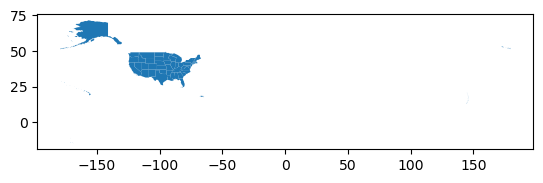

In [9]:
# Check crs 
print(states.crs)
states.plot()

## for loops

It can be easier to work with the codes as numbers instead of strings, so let’s update the corresponding columns in the states geo-dataframe. We start by checking the data type of the `region`, `division`, and `statefp` columns:

In [10]:
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"region is string dtype? {is_string_dtype(states['division'])}")
print(f"region is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
region is string dtype? True
region is string dtype? True


Instead, using a `for` loop allows to succintly print the same info 

In [11]:
# List of column names 
code_cols = ['region', 'division', 'statefp']

# Check whether code columns are strings 
for column in code_cols: 
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


`for` loops execute a block of code a fixed number of times, iterating over a set of objects. In this case, we iterate over the list of column names 

**DRY code** 

DRY = don't repeat yourself is a core programming principle that encourages reducing redundacy and consolidating repeated logic. 
If you need to repat the "same" code more than twice, you probably need a `for` loop.

Next, update type of the code columns to be intergers. 

This time, we verify the data type of the column using the `is_numeric_dtype()` and `assert` statement: 

In [12]:
# Update code columns into intergers 
for column in code_cols: 
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column]) # Check conversion 
                           

The `assert` keyword does nothing if the expression next to it evaluates to `True`.

If the expression evaluates to `False` then assert raises an `AssertionError` and stops your code from running. 

In [13]:
# Does nothing if statement is True 
assert 2 + 2 == 4

In [15]:
# Error if false 
#assert 2 + 2 == 3

## Data selection 

- What are the unique values for region, division, or state codes in the data?
- Which codes should we select to keep only states in the contiguous US? 

In [16]:
# For loop to check unique values 
for column in code_cols: 
    print(f"{column} unique values: {states[column].unique()}")

region unique values: [3 2 1 4 9]
division unique values: [5 3 4 1 8 9 2 7 6 0]
statefp unique values: [54 12 17 27 24 44 16 33 37 50  9 10 35  6 34 55 41 31 42 53 22 13  1 49
 39 48  8 45 40 47 56 15 38 21 78 69 66 23 36 32  2 60 26  5 28 29 30 20
 18 72 46 25 51 11 19  4]


Hawaii and Alaska have codes 2, 15, and then region 9 should also be excluded. 

In [17]:
# Select contiguous US states
contiguous = states[(states.region!=9) & (~states.statefp.isin([2,15]))]

<Axes: >

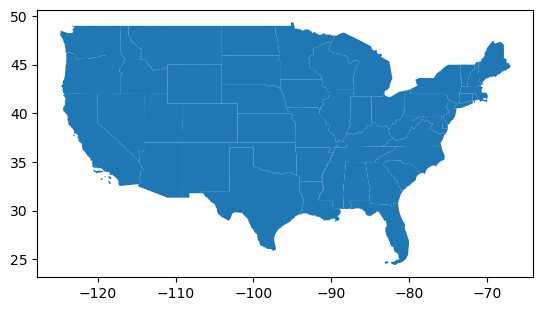

In [18]:
contiguous.plot()

The `~` tilde symbol is used in Python to negate a statement. 

## Check in 
Select the data in the `power_plants` data frame for the continguous US states 

In [19]:
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

In [20]:
contiguous.crs ==power_plants.crs

True

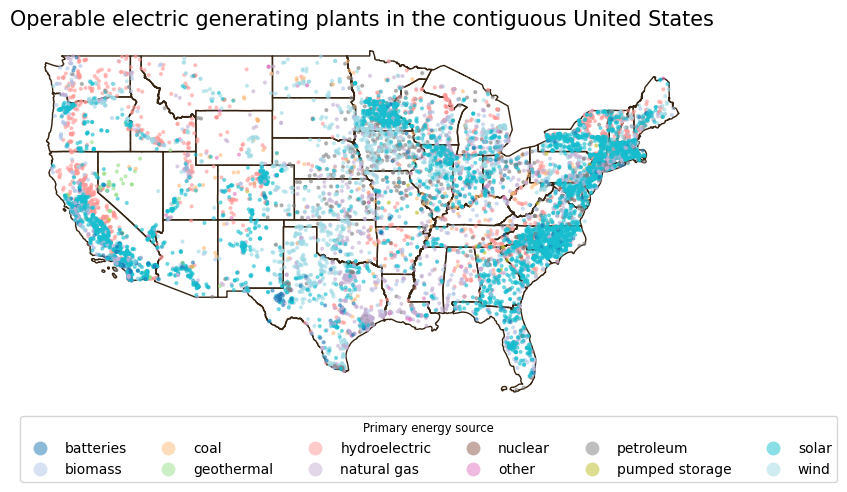

In [21]:
fig, ax = plt.subplots(figsize = (9, 5))

# Remove the axis 
ax.axis('off')

# Add states 
contiguous.plot(ax=ax,
               color='none',
               edgecolor='#362312')

# Title for the plot
ax.set_title('Operable electric generating plants in the contiguous United States', 
              fontsize=15)

# Add power plants colored by energy source 
power_plants.plot(ax=ax,
                 column='primsource',
                  legend=True,
                 markersize=4,
                 cmap='tab20',
                 alpha=0.5,
                 legend_kwds={
                     'title':'Primary energy source',
                     'title_fontsize':'small',
                     'loc':'upper left',
                     'bbox_to_anchor':(0,0),
                     'ncol':6
                 })

plt.show()

We controlled the legend location using `loc` and `bbox_to_anchor` in the `legend_kwds`

- `loc` indicates the corener of the legend that we want to use for placement
- `bbox_to_anchor` s a tuple with coordinates indicating where to place the corner specified in loc relative to the axes. Values between 0 and 1 are within the axes.

`matplotlib` uses a variety of ways to locate elements within the graph and it is best to check the documentation to not spend too much time fidling with locations.



## `for` with `zip`

Often, we need to iterate simultaneously over two lists (or other iterables).

The `zip()` function in Python allows you to combine two or more lists (or other iterables) so that you can iterate over their elements in pairs. When used with a `for` loop, it lets you process elements from each list together, like this example:

In [22]:
# Iterate over a single list 
numbers = [1, 2, 3]
for num in numbers: 
    print(num)

1
2
3


In [23]:
# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num, letter)

1 a
2 b
3 c


Example with `matplotlib`

A common situation when code gets repeated is when creating subplots. 

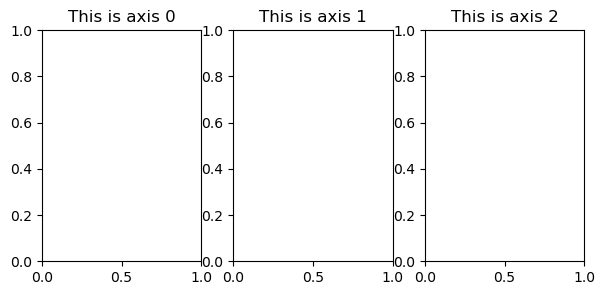

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()

In [25]:
axes

array([<Axes: title={'center': 'This is axis 0'}>,
       <Axes: title={'center': 'This is axis 1'}>,
       <Axes: title={'center': 'This is axis 2'}>], dtype=object)

`axes` is an array of axes we can iterate over. Remeber the figure and the axes are sperate elements in a matplotlib plot.  

## Check in 

Use `for` and `zip` to create the same subplots and avoid redundancy. 

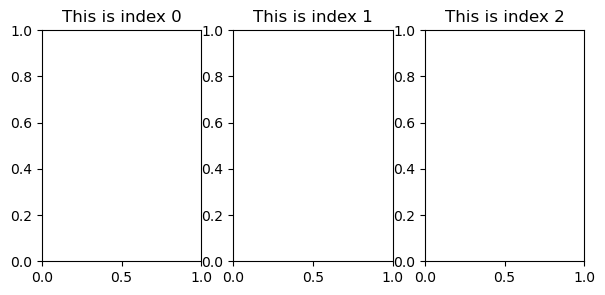

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

# Iterate through axes and index 
for ax, i in zip(axes, [0, 1, 2]):
    ax.set_title(f'This is index {i}')

plt.show()

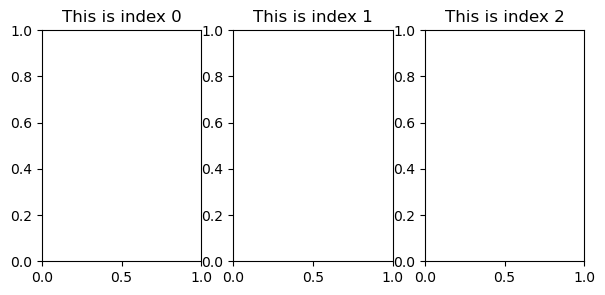

In [35]:
# Another way to do it without zip()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

# Iterate through axes and index 
for i in [0, 1, 2]:
    axes[i].set_title(f'This is index {i}')

plt.show()

## Exercise 

1. Select the power plants in California in a variable named ca_power_plants.

2. Create a list named top_sources with California’s top 3 electric primary sources.

3. Isolate the California state boundary in a variable named ca_boundary.

In [62]:
# Select power plants in california 
ca_power_plants = power_plants[power_plants['state'] == 'California']

# Check new data frame 
ca_power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
19,11589,34,Rollins,13402,Nevada Irrigation District,IPP Non-CHP,15531 Arrow Head Lane,Colfax,Placer,California,95713.0,hydroelectric,Hydroelectric = 12.1 MW,Conventional Hydroelectric,12.1,12.1,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.953341,39.134259,POINT (-120.95334 39.13426)
38,11608,72,Venice Hydro,12397,Metropolitan Water District of S CA,Electric Utility,3815 Sepulveda Blvd,Culver City,Los Angeles,California,90230.0,hydroelectric,Hydroelectric = 10.1 MW,Conventional Hydroelectric,10.1,10.1,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-118.416800,34.011350,POINT (-118.41680 34.01135)
54,11624,104,J S Eastwood,17609,Southern California Edison Co,Electric Utility,Hwy 168 Sierra National Forest,Shaver Lake,Fresno,California,93664.0,pumped storage,Pumped Storage = 199.8 MW,Hydroelectric Pumped Storage,199.8,199.8,NaN,NaN,NaN,NaN,NaN,199.8,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-119.256700,37.147926,POINT (-119.25670 37.14793)


In [64]:
# Create a list with the top 3 electric sources 
top_sources = ca_power_plants.primsource.value_counts().index[:3].tolist()

# View top sources 
top_sources

['solar', 'natural gas', 'hydroelectric']

<Axes: >

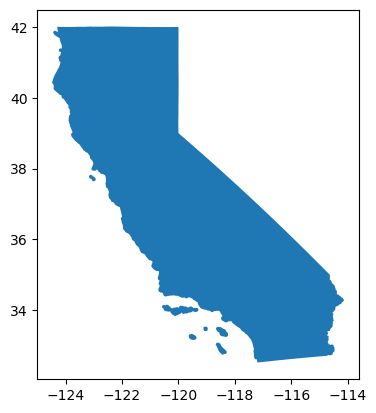

In [49]:
# Isolate the california boundary 
ca_boundary = states[states['name'] == "California"]

# View california 
ca_boundary.plot()

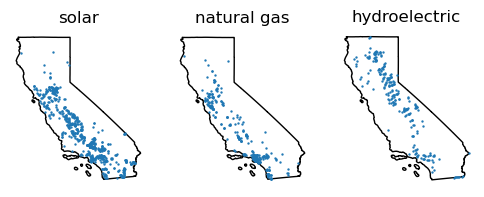

In [66]:
# Create an axis that prints state three times 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6,3))

# Need to iterate over the energy source with the axes
for ax, source in zip(axes, top_sources):
    ca_boundary.plot(ax=ax,
                    color='none')
    # Select points for the sources
    subset = ca_power_plants[ca_power_plants.primsource == source]
    # Plot that subset 
    subset.plot(ax=ax, markersize=0.5)
    ax.set_title(source)
    ax.axis('off')
    
plt.show()

## Functions


Next, we want to keep exploring these maps of the top 3 electric primary sources for different states. This is a scenario where creating functions can be useful. In Python, **functions** are blocks of reusable code designed to perform specific tasks, helping to make your code more modular and organized. The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

We define a function using:

1. the `def` keyword, followed by the function name, parentheses (which can contain parameters), and a colon.

2. The first line(s) of the function should be a `docstring`, this is a special kind of comment used to describe what the function will do. It must be indented and in between triple quotes ``"""`.

3. After the docstring, you write the body of the function, this is the code that will be executed when the function is called. The wholek body of the function should be indentated to indicate the function’s scope.

4. The `return` keywork is used to allow the function to return values. Functions that do not return any values don’t need to have a `return` keyword.


Example:  In the first one we have a simple function with a one-line docstring, no parameters, and no return values.

In [67]:
def greet():
    """Print a greeting message"""
    print('Hello, welcome')

In [68]:
# Call the function 
greet()

Hello, welcome


Example 2: a function with a more detailed docstring and a return value

In [69]:
def circle_area(radius):
    """
    Calculate the area of a circle given its radius. 
    
    Args:
       radius (float): The radius of the circle 
    Returns:
        float: The area of the circle, calculated as pi * radius^2
    """
    area = 3.14159 * radius ** 2
    return area

In [70]:
# Call the function 
circle_area(5)

78.53975

In [72]:
# View the docstring of the function 
help(circle_area)

Help on function circle_area in module __main__:

circle_area(radius)
    Calculate the area of a circle given its radius. 
    
    Args:
       radius (float): The radius of the circle 
    Returns:
        float: The area of the circle, calculated as pi * radius^2



## Example 

Going back to our power_plant data frame. let's create a function that will give us the top 3 primary energy sources for a given state. 

In [74]:
def top3_sources(state):
    state_power_plants = power_plants[power_plants['state']==state] # Filter by given state
    top_sources = state_power_plants['primsource'].value_counts().index[:3].tolist() # List top 3 sources
    
    return top_sources                    

In [75]:
# Input New York to function 
top3_sources('New York')

['solar', 'hydroelectric', 'natural gas']